The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classiﬁcation problem1. The dataset was constructed from a number of scanned document datasets available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modiﬁed NIST or MNIST dataset. Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. Each image is a 28⇥28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it. 

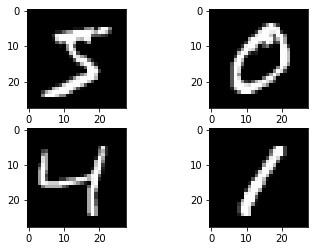

In [4]:
# Plot ad hoc mnist instances 
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
# load (downloaded if needed) the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[0], cmap=plt.get_cmap('gray' )) 
plt.subplot(222) 
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' )) 
# show the plot 
plt.show()


## Baseline Model with Multilayer Perceptrons
Do we really need a complex model like a convolutional neural network to get the best results with MNIST? You can get good results using a very simple neural network model with a single hidden layer. In this section we will create a simple Multilayer Perceptron model that achieves an error rate of 1.74%. We will use this as a baseline for comparison to more complex convolutional neural network models. Let’s start o↵ by importing the classes and functions we will need.


In [0]:
import numpy 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

It is always a good idea to initialize the random number generator to a constant to ensure that the results of your script are reproducible.


In [0]:
# fix random seed for reproducibility 
seed = 7 
numpy.random.seed(seed)

Now we can load the MNIST dataset using the Keras helper function.


In [0]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a Multilayer Perceptron model we must reduce the images down into a vector of pixels. In this case the 28 x 28 sized images will be 784 pixel input vectors. We can do this transform easily using the reshape() function on the NumPy array. The pixel values are integers, so we cast them to ﬂoating point values so that we can normalize them easily in the next step.


In [0]:
# flatten 28*28 images to a 784 vector for each image 
num_pixels = X_train.shape[1] * X_train.shape[2] 
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.


In [0]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multiclass classiﬁcation problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We can easily do this using the built-in np utils.to categorical() helper function in Keras.


In [0]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

We are now ready to create our simple neural network model. We will deﬁne our model in a function. This is handy if you want to extend the example later and try and get a better score.


In [0]:
# define baseline model 
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Dense(num_pixels, input_dim=num_pixels, init= 'normal' , activation='relu')) 
  model.add(Dense(num_classes, init= 'normal' , activation= 'softmax' )) 
  # Compile model 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectiﬁer activation function is used for the neurons in the hidden layer. A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical crossentropy in Keras) and the ecient ADAM gradient descent algorithm is used to learn the weights. We can now ﬁt and evaluate the model. The model is ﬁt over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch. Finally, the test dataset is used to evaluate the model and a classiﬁcation error rate is printed.


In [9]:
# build the model 
model = baseline_model() 
# Fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2810 - accuracy: 0.9205 - val_loss: 0.1413 - val_accuracy: 0.9568
Epoch 2/10
 - 5s - loss: 0.1116 - accuracy: 0.9676 - val_loss: 0.0918 - val_accuracy: 0.9713
Epoch 3/10
 - 5s - loss: 0.0716 - accuracy: 0.9798 - val_loss: 0.0782 - val_accuracy: 0.9776
Epoch 4/10
 - 5s - loss: 0.0505 - accuracy: 0.9858 - val_loss: 0.0746 - val_accuracy: 0.9767
Epoch 5/10
 - 5s - loss: 0.0372 - accuracy: 0.9892 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 6/10
 - 5s - loss: 0.0268 - accuracy: 0.9927 - val_loss: 0.0631 - val_accuracy: 0.9805
Epoch 7/10
 - 5s - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 8/10
 - 5s - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.0617 - val_accuracy: 0.9801
Epoch 9/10
 - 5s - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.0576 - val_accuracy: 0.9815
Epoch 10/10
 - 5s - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0590 - val_accuracy: 0.9819
Baseline Error: 1.8

Running the example might take a few minutes when run on a CPU. You should see the output below. This simple network deﬁned in very few lines of code achieves a respectable error rate of 1.81%.
## Simple Convolutional Neural Network for MNIST
Now that we have seen how to load the MNIST dataset and train a simple Multilayer Perceptron model on it, it is time to develop a more sophisticated convolutional neural network or CNN model. Keras does provide a lot of capability for creating convolutional neural networks. In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers. The ﬁrst step is to import the classes and functions needed.



In [0]:
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers.convolutional import Convolution2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils

Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [channels][width][height]. In the case of RGB, the ﬁrst dimension channels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the channels values are gray scale, the pixel dimension is set to 1.


In [0]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') 
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255
X_test = X_test / 255 
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

#### Next we deﬁne our neural network model. Convolutional neural networks are more complex than standard Multilayer Perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state-of-the-art results. Below summarizes the network architecture.
1. The ﬁrst hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5⇥5 and a rectiﬁer activation function. This is the input layer, expecting images with the structure outline above.
2. Next we deﬁne a pooling layer that takes the maximum value called MaxPooling2D. It is conﬁgured with a pool size of 2⇥2. 3. The next layer is a regularization layer using dropout called Dropout. It is conﬁgured to randomly exclude 20% of neurons in the layer in order to reduce overﬁtting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectiﬁer activation function is used.
6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.
As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [0]:
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Convolution2D(32,(5, 5), input_shape=(1,28, 28),border_mode='same', activation= 'relu',data_format = 'channels_first' )) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Flatten()) 
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(num_classes, activation='softmax')) 
  # Compile model 
  model.compile(loss= 'categorical_crossentropy', optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

We evaluate the model the same way as before with the Multilayer Perceptron. The CNN is ﬁt over 10 epochs with a batch size of 200.


In [37]:
# build the model 
model = baseline_model() 
# Fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0)

print("CNN Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(1, 28, 28..., activation="relu", data_format="channels_first", padding="same")`
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 49s - loss: 0.2679 - accuracy: 0.9212 - val_loss: 0.0913 - val_accuracy: 0.9713
Epoch 2/10
 - 54s - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0514 - val_accuracy: 0.9826
Epoch 3/10
 - 49s - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0503 - val_accuracy: 0.9831
Epoch 4/10
 - 49s - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0412 - val_accuracy: 0.9871
Epoch 5/10
 - 49s - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 6/10
 - 49s - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 7/10
 - 49s - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0368 - val_accuracy: 0.9870
Epoch 8/10
 - 49s - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 9/10
 - 49s - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0319 - val_accuracy: 0.9901
Epoch 10/10
 - 49s - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0377 - val_accuracy: 0.9890
CNN Error

Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classiﬁcation error rate is printed. Epochs may take 60 seconds to run on the CPU, or about 10 minutes in total depending on your hardware. You can see that the network achieves an error rate of 1.00, which is better than our simple Multilayer Perceptron model above.


## Larger Convolutional Neural Network for MNIST
Now that we have seen how to create a simple CNN, let’s take a look at a model capable of close to state-of-the-art results. We import the classes and functions then load and prepare the data the same as in the previous CNN example. This time we deﬁne a larger CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows. 
1. Convolutional layer with 30 feature maps of size 5⇥5. 
2. Pooling layer taking the max over 2⇥2 patches. 
3. Convolutional layer with 15 feature maps of size 3⇥3.
4. Pooling layer taking the max over 2⇥2 patches. 
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectiﬁer activation.
8. Fully connected layer with 50 neurons and rectiﬁer activation.
9. Output layer.

In [0]:
from tensorflow import *
import tensorflow

In [19]:
tensorflow.config.experimental.list_physical_devices('GPU')

tensorflow.config.experimental.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [38]:
def larger_model():
   # create model 
   model = Sequential() 
   model.add(Convolution2D(30,(5, 5), input_shape=(1,28, 28),border_mode='same', activation= 'relu',data_format = 'channels_first' )) 
   model.add(MaxPooling2D(pool_size=(2, 2))) 
   model.add(Convolution2D(15, 3, 3, activation= 'relu' ,border_mode='same')) 
   model.add(MaxPooling2D(pool_size=(2, 2))) 
   model.add(Dropout(0.2)) 
   model.add(Flatten()) 
   model.add(Dense(128, activation= 'relu' )) 
   model.add(Dense(50, activation= 'relu' )) 
   model.add(Dense(num_classes, activation='softmax')) 
   # Compile model 
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
   return model 

# build the model 
model = larger_model() 
# Fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(1, 28, 28..., activation="relu", data_format="channels_first", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", padding="same")`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 62s - loss: 0.4159 - accuracy: 0.8721 - val_loss: 0.1388 - val_accuracy: 0.9576
Epoch 2/10
 - 61s - loss: 0.1323 - accuracy: 0.9600 - val_loss: 0.0808 - val_accuracy: 0.9740
Epoch 3/10
 - 61s - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.0607 - val_accuracy: 0.9809
Epoch 4/10
 - 61s - loss: 0.0724 - accuracy: 0.9772 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 5/10
 - 61s - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 6/10
 - 61s - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 7/10
 - 61s - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 8/10
 - 60s - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 9/10
 - 60s - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 10/10
 - 61s - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.0288 - val_accuracy: 0.9913
Large CNN

Running the example prints accuracy on the training and validation datasets each epoch and a ﬁnal classiﬁcation error rate. The model takes about 60 seconds to run per epoch on a modern CPU. 


This slightly larger model achieves the respectable classiﬁcation error rate of 0.8%.


This is not an optimized network topology. Nor is this a reproduction of a network topology from a recent paper. There is a lot of opportunity for you to tune and improve upon this model.
